In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.model import *
from ts.utility import Utility, Metric
from ts.plot import Plot

%matplotlib inline

# Data

In [2]:
n = 4000

univarData = StandardGenerator('extreme_long').generate(n)
print(univarData.shape, univarData.dtype)

(4000,) float64


In [3]:
trainSize = 3000

trainData, testData = Utility.trainTestSplit(univarData, trainSize,)

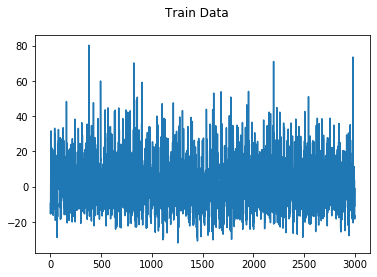

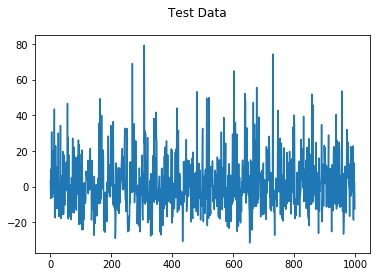

In [4]:
Plot.plotDataCols(trainData, title='Train Data')
Plot.plotDataCols(testData, title='Test Data')

In [5]:
trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1),
    seqLength=500
)

In [6]:
def displayMetrics(pred, target):
    
    mape = float(Metric.mape(pred, target))
    mae = float(Metric.mae(pred, target))
    mpe = float(Metric.mpe(pred, target))
    mse = float(Metric.mse(pred, target))
    rmse = float(Metric.rmse(pred, target))

    print(
        f'MAPE: {mape: .2f} MAE: {mae: .2f} '
        + f'MPE: {mpe: .2f} MSE: {mse: .2f} RMSE: {rmse: .2f}'
    )

## GMM-HMM model

True


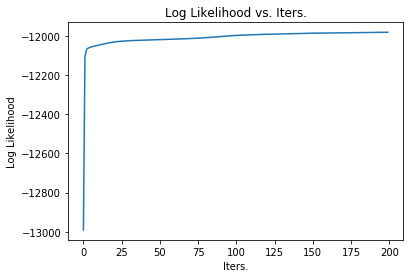

In [7]:
numStates = 6
numMixtureComp = 4
dimension = 1
d = 50
numIterations = 200
threshold = 0.0

model = GmmHmmForecast(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    d=d,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')
print(model.model.monitor_.converged)

(950, 1) (950, 1)


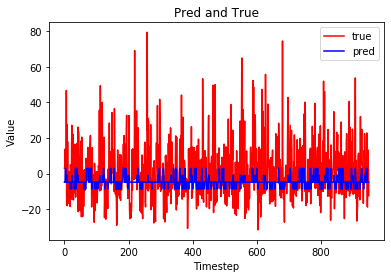

In [8]:
minValue = trainData.min()
maxValue = trainData.max()
numValues = 30
discParamSet = [np.linspace(minValue, maxValue, numValues)]

pred = model.predict(np.expand_dims(testData, axis=1), discParamSet)
target = np.expand_dims(testData[d:], axis=1)

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

In [9]:
displayMetrics(pred, target)

MAPE:  309.12 MAE:  12.26 MPE:  23.55 MSE:  273.36 RMSE:  16.53


## GMM HMM Likelihood Similarity Model

Text(0.5, 1.0, 'Log Likelihood vs. Iters.')

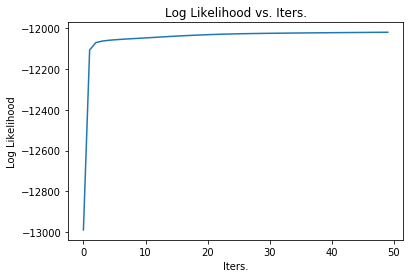

In [10]:
numStates = 6
numMixtureComp = 4
dimension = 1
numIterations = 50
threshold = 0.0

model = GmmHmmLikelihoodSimilarity(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')

(999, 1) (999, 1)


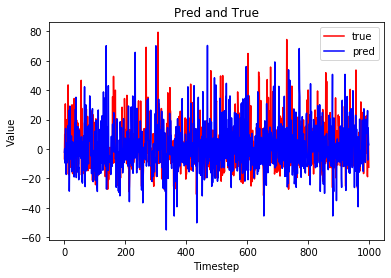

In [11]:
pred = model.predict(np.expand_dims(testData, axis=1))[:testData.shape[0] - 1]
target = np.expand_dims(testData[1:], axis=1)

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

In [12]:
displayMetrics(pred, target)

MAPE:  520.30 MAE:  17.05 MPE:  318.77 MSE:  488.92 RMSE:  22.11


## GRU model

Epoch 1/25
6/6 [==============================] - 3s 459ms/step - loss: 200.7013
Epoch 2/25
6/6 [==============================] - 3s 437ms/step - loss: 199.6037
Epoch 3/25
6/6 [==============================] - 3s 438ms/step - loss: 198.9288
Epoch 4/25
6/6 [==============================] - 3s 439ms/step - loss: 198.0758
Epoch 5/25
6/6 [==============================] - 3s 458ms/step - loss: 197.0699
Epoch 6/25
6/6 [==============================] - 3s 437ms/step - loss: 195.0118
Epoch 7/25
6/6 [==============================] - 3s 438ms/step - loss: 193.2968
Epoch 8/25
6/6 [==============================] - 3s 437ms/step - loss: 191.5997
Epoch 9/25
6/6 [==============================] - 3s 451ms/step - loss: 191.3129
Epoch 10/25
6/6 [==============================] - 3s 444ms/step - loss: 191.8573
Epoch 11/25
6/6 [==============================] - 3s 437ms/step - loss: 190.3915
Epoch 12/25
6/6 [==============================] - 3s 438ms/step - loss: 189.8632
Epoch 13/25
6/6 [========

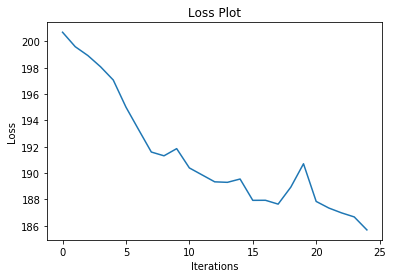

In [13]:
forecastHorizon = 1
stateSize = 30
activation = 'tanh'
numRnnLayers = 5
numTargetVariables = 1
numExoVariables = 0

model = GruForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 25
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(999, 1) (999, 1)


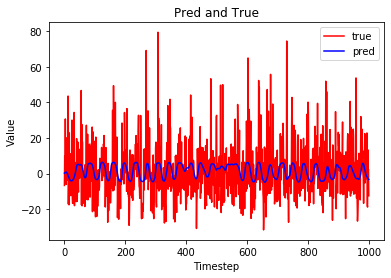

In [14]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = np.expand_dims(testData[forecastHorizon:], axis=1)

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [15]:
displayMetrics(pred, target)

MAPE:  299.49 MAE:  11.26 MPE:  240.40 MSE:  217.54 RMSE:  14.75


## LSTM

Epoch 1/25
6/6 [==============================] - 2s 389ms/step - loss: 200.8431
Epoch 2/25
6/6 [==============================] - 2s 385ms/step - loss: 195.8588
Epoch 3/25
6/6 [==============================] - 3s 417ms/step - loss: 191.7415
Epoch 4/25
6/6 [==============================] - 2s 401ms/step - loss: 188.1457
Epoch 5/25
6/6 [==============================] - 2s 386ms/step - loss: 186.2260
Epoch 6/25
6/6 [==============================] - 2s 385ms/step - loss: 185.0290
Epoch 7/25
6/6 [==============================] - 2s 389ms/step - loss: 184.8806
Epoch 8/25
6/6 [==============================] - 2s 390ms/step - loss: 185.5047
Epoch 9/25
6/6 [==============================] - 2s 386ms/step - loss: 183.1103
Epoch 10/25
6/6 [==============================] - 2s 387ms/step - loss: 182.9323
Epoch 11/25
6/6 [==============================] - 2s 386ms/step - loss: 182.3436
Epoch 12/25
6/6 [==============================] - 2s 387ms/step - loss: 181.5604
Epoch 13/25
6/6 [========

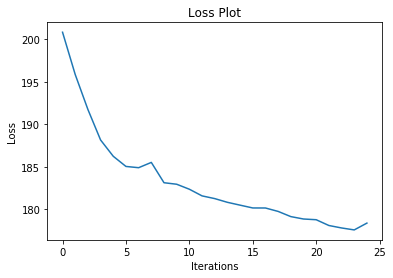

In [16]:
forecastHorizon = 1
stateSize = 30
activation = 'tanh'
numRnnLayers = 5
numTargetVariables = 1
numExoVariables = 0

model = LstmForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 25
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(999, 1) (999, 1)


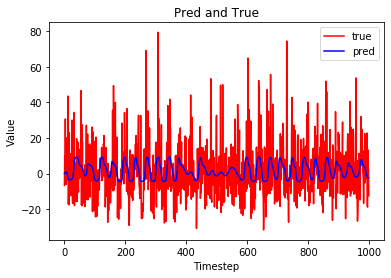

In [17]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = np.expand_dims(testData[forecastHorizon:], axis=1)

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [18]:
displayMetrics(pred, target)

MAPE:  270.98 MAE:  11.24 MPE:  193.00 MSE:  213.67 RMSE:  14.62


## Extreme Model 1

begin iteration 0
Completed Iteration: 0 | time taken:  29.45 sec | Avg Iteration Loss: 204.46372790198788
begin iteration 1
Completed Iteration: 1 | time taken:  29.48 sec | Avg Iteration Loss: 207.64493154239287
begin iteration 2
Completed Iteration: 2 | time taken:  29.79 sec | Avg Iteration Loss: 202.22886026469982
begin iteration 3
Completed Iteration: 3 | time taken:  29.67 sec | Avg Iteration Loss: 205.7104148383562
begin iteration 4
Completed Iteration: 4 | time taken:  29.85 sec | Avg Iteration Loss: 199.67434658102061
begin iteration 5
Completed Iteration: 5 | time taken:  29.57 sec | Avg Iteration Loss: 198.18183535029013
begin iteration 6
Completed Iteration: 6 | time taken:  29.36 sec | Avg Iteration Loss: 196.3447698857915
begin iteration 7
Completed Iteration: 7 | time taken:  29.58 sec | Avg Iteration Loss: 197.88936619201615
begin iteration 8
Completed Iteration: 8 | time taken:  30.03 sec | Avg Iteration Loss: 196.67229536595508
begin iteration 9
Completed Iteration: 

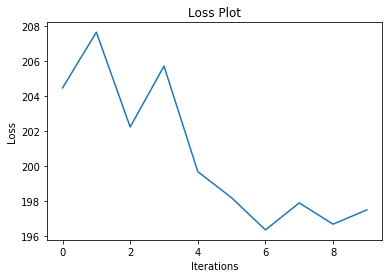

In [19]:
forecastHorizon = 1
memorySize = 60
windowSize = 50
encoderStateSize = 20
lstmStateSize = 20
numExoVariables = 0

model = ExtremeTime(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    encoderStateSize=encoderStateSize,
    lstmStateSize=lstmStateSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(999,) (999,)


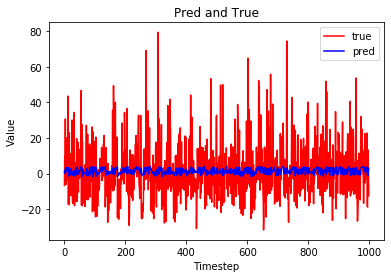

In [20]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [21]:
displayMetrics(pred, target)

MAPE:  211.11 MAE:  11.62 MPE:  188.17 MSE:  232.90 RMSE:  15.26


## Extreme Model 2

begin iteration 0
Completed Iteration: 0 | time taken:  53.46 sec | Avg Iteration Loss: 200.29813218342966
begin iteration 1
Completed Iteration: 1 | time taken:  53.22 sec | Avg Iteration Loss: 196.63504147795666
begin iteration 2
Completed Iteration: 2 | time taken:  52.91 sec | Avg Iteration Loss: 196.61147644817592
begin iteration 3
Completed Iteration: 3 | time taken:  55.27 sec | Avg Iteration Loss: 195.2468989821209
begin iteration 4
Completed Iteration: 4 | time taken:  51.53 sec | Avg Iteration Loss: 195.5530533420324
begin iteration 5
Completed Iteration: 5 | time taken:  52.56 sec | Avg Iteration Loss: 194.21564822774909
begin iteration 6
Completed Iteration: 6 | time taken:  53.18 sec | Avg Iteration Loss: 193.71979924544266
begin iteration 7
Completed Iteration: 7 | time taken:  53.20 sec | Avg Iteration Loss: 192.55040933120952
begin iteration 8
Completed Iteration: 8 | time taken:  53.15 sec | Avg Iteration Loss: 193.94211673981616
begin iteration 9
Completed Iteration: 

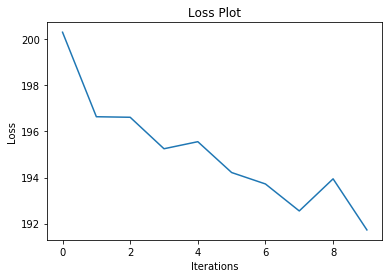

In [22]:
forecastHorizon = 1
memorySize = 60
windowSize = 50
embeddingSize = 20
contextSize = 20
numExoVariables = 0

model = ExtremeTime2(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    embeddingSize=embeddingSize,
    contextSize=contextSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(999,) (999,)


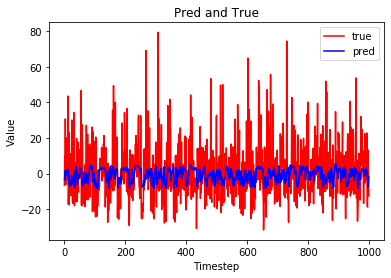

In [23]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [24]:
displayMetrics(pred, target)

MAPE:  224.99 MAE:  11.51 MPE:  189.55 MSE:  235.15 RMSE:  15.33


## MLP

Epoch 1/10
6/6 [==============================] - 0s 2ms/step - loss: 257.0258
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 202.9098
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 202.9646
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 202.7218
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 202.4469
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 202.1727
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 201.9258
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 201.6716
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 201.3962
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 201.2135


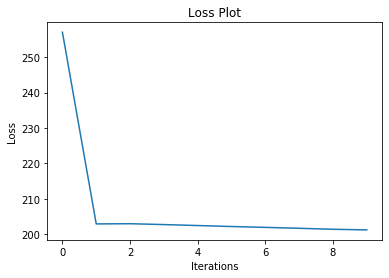

In [25]:
forecastHorizon = 1
lag = 50
activation = 'relu'
numUnitsPerLayer = 20
numLayers = 3
numTargetVariables = 1
numExoVariables = 0

model = DeepNN(
    forecastHorizon=1,
    lag=lag,
    activation=activation,
    numUnitsPerLayer=numUnitsPerLayer,
    numLayers=numLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences,
    numIterations=numIterations,
    optimizer=optimizer
)
Plot.plotLoss(losses)

(949,) (949,)


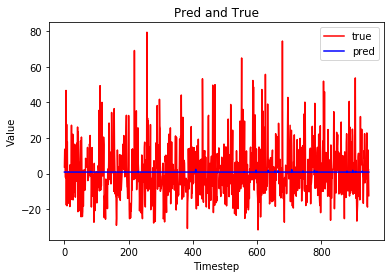

In [26]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[lag + forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [27]:
displayMetrics(pred, target)

MAPE:  131.52 MAE:  11.69 MPE:  124.20 MSE:  238.59 RMSE:  15.45
